# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [39]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [40]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [41]:
websites


websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [42]:
website_features = ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 
                    'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

website_features

['URL',
 'URL_LENGTH',
 'NUMBER_SPECIAL_CHARACTERS',
 'CHARSET',
 'SERVER',
 'CONTENT_LENGTH',
 'WHOIS_COUNTRY',
 'WHOIS_STATEPRO',
 'WHOIS_REGDATE',
 'WHOIS_UPDATED_DATE']

In [43]:
target_feature = 'Type'

print("Code representation for benign vs malicious websites:")
print(websites[target_feature].value_counts())

Code representation for benign vs malicious websites:
Type
0    1565
1     216
Name: count, dtype: int64


In [44]:
columns_to_transform = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'Type']

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

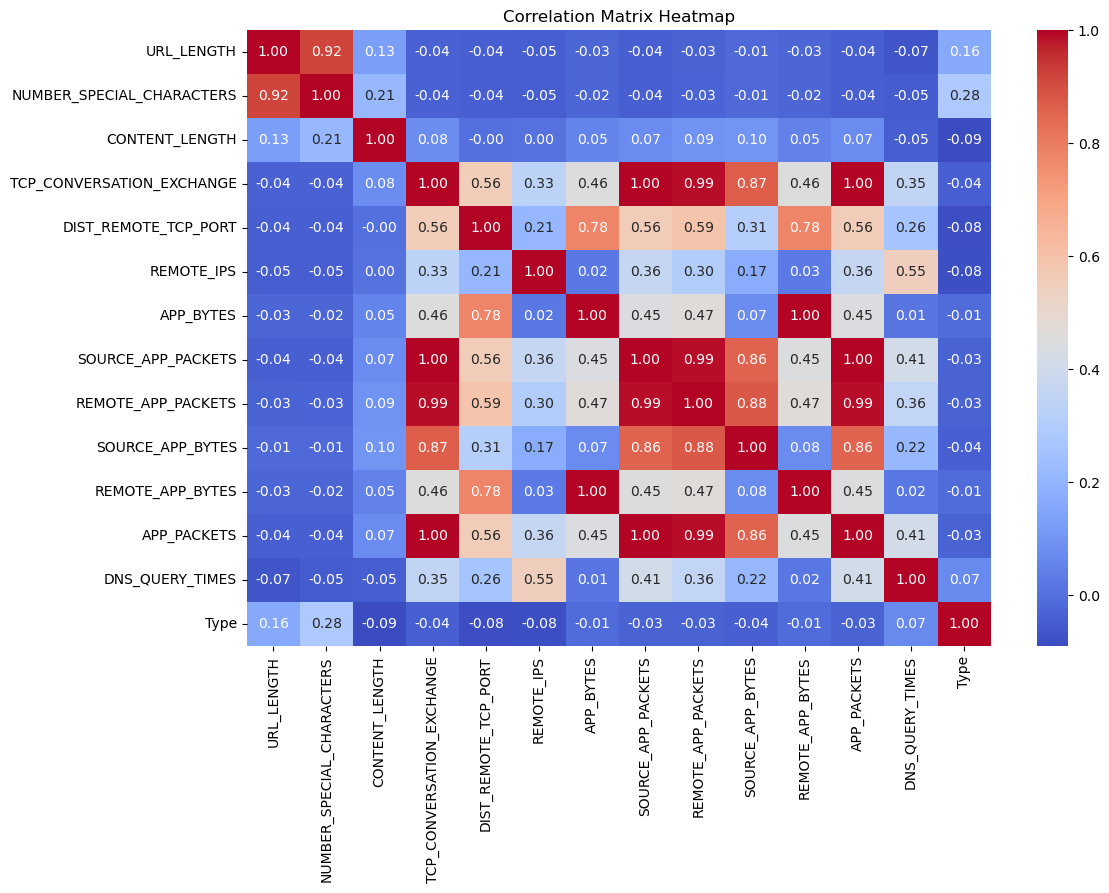

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = websites.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


In [46]:
# Your comment here

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [47]:
websites.drop('APP_PACKETS', axis=1, inplace=True)
websites.drop('REMOTE_APP_PACKETS', axis=1, inplace=True)
websites.drop('SOURCE_APP_PACKETS', axis=1, inplace=True)


In [48]:
# Your comment here

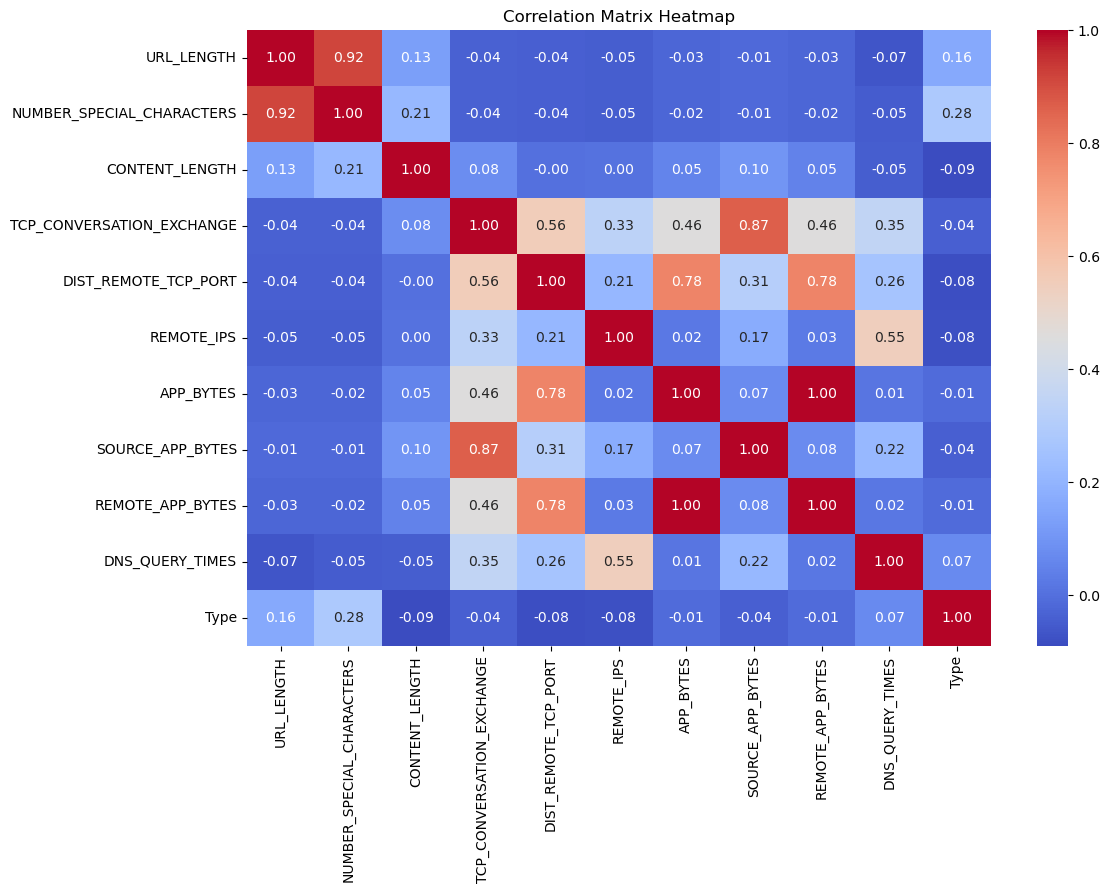

In [49]:
numeric_columns = websites.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [50]:
missing_values = websites.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [51]:
missing_values = websites.isnull().sum() 

columns_to_drop = missing_values[missing_values >= 500].index
websites.drop(columns=columns_to_drop, inplace=True)


In [52]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [53]:
# Examine missing values in each column


# Challenge 4 - Handle `WHOIS_*` Categorical Data

here are several categorical columns we need to handle. These columns are:

* `URL`T
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [54]:
unique_countries = websites['WHOIS_COUNTRY'].unique()

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()

websites['WHOIS_COUNTRY'].replace({
    'CYPRUS': 'CY',
    'US': 'US',
    'SE': 'SE',
    'UNITED KINGDOM': 'GB',
    "[U'GB'; U'UK']": 'GB'
}, inplace=True)

print("\nUnique countries after consolidation:", websites['WHOIS_COUNTRY'].unique())


Unique countries after consolidation: [nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' 'FR' 'NL'
 'UG' 'JP' 'CN' 'SI' 'IL' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE'
 'ES' 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY' 'AE' 'IE' 'UY'
 'KG']


are workarounds under certain conditions. One of the fixable conditions is:
Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there 
#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [55]:
import numpy as np

threshold = 10  

country_counts = websites['WHOIS_COUNTRY'].value_counts()

top_countries = country_counts[country_counts >= threshold].index.tolist()

websites['WHOIS_COUNTRY'] = np.where(websites['WHOIS_COUNTRY'].isin(top_countries), websites['WHOIS_COUNTRY'], 'OTHER')

print("Unique values after re-labeling:", websites['WHOIS_COUNTRY'].unique())


Unique values after re-labeling: ['OTHER' 'US' 'GB' 'UK' 'AU' 'CA' 'PA' 'IN' 'JP' 'CN' 'ES']


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [84]:
top_countries = country_counts.nlargest(10).index.tolist()

# Replace all other rare values with 'OTHER'
websites['WHOIS_COUNTRY'] = np.where(websites['WHOIS_COUNTRY'].isin(top_countries), websites['WHOIS_COUNTRY'], 'OTHER')

# Verify the changes
print("Unique values after re-labeling:", websites['WHOIS_COUNTRY'].unique())


Unique values after re-labeling: ['OTHER' 'US' 'GB' 'UK' 'AU' 'CA' 'PA' 'IN' 'JP' 'CN' 'ES']


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [85]:
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)




KeyError: "['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'] not found in axis"

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [86]:
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [87]:
websites.drop('URL', axis=1, inplace=True)


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [91]:
print(websites['CHARSET'].unique())

['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' nan 'windows-1251'
 'ISO-8859' 'windows-1252']


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [95]:
print(websites['SERVER'].value_counts())


SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64


![Think Hard](../images/think-hard.jpg)

In [96]:
server_mapping = {
    'Apache': 'Apache',
    'nginx': 'nginx',
    'Microsoft-HTTPAPI/2.0': 'Microsoft',
    'cloudflare-nginx': 'cloudflare',
    'Microsoft-IIS/7.5': 'Microsoft',
    # Add more mappings as needed
}

# Replace values in SERVER column using the mapping dictionary
websites['SERVER'] = websites['SERVER'].replace(server_mapping)


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [98]:
main_servers = ['Microsoft', 'Apache', 'nginx']

# Function to label servers
def label_server(server):
    if pd.isnull(server):
        return 'Other'
    for main_server in main_servers:
        if main_server in server:
            return main_server
    return 'Other'

# Apply the function to label servers
websites['SERVER'] = websites['SERVER'].apply(label_server)



In [99]:
print(websites['SERVER'].value_counts())



SERVER
Apache       643
Other        599
nginx        341
Microsoft    198
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [100]:
website_dummy = pd.get_dummies(websites)

website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,7,7,0,2,700,1153,832,2.0,1,...,False,False,False,False,False,False,True,False,False,False
1,16,6,17,7,4,1230,1265,1230,0.0,0,...,False,False,False,False,False,False,True,False,False,False
2,16,6,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,True,False,False,False
3,17,6,31,22,3,3812,18784,4380,8.0,0,...,False,False,False,False,False,False,False,False,False,True
4,17,6,57,2,5,4278,129889,4586,4.0,0,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [101]:
website_dummy.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 4   REMOTE_IPS                 1781 non-null   int64  
 5   APP_BYTES                  1781 non-null   int64  
 6   SOURCE_APP_BYTES           1781 non-null   int64  
 7   REMOTE_APP_BYTES           1781 non-null   int64  
 8   DNS_QUERY_TIMES            1780 non-null   float64
 9   Type                       1781 non-null   int64  
 10  CHARSET_ISO-8859           1781 non-null   bool   
 11  CHARSET_ISO-8859-1         1781 non-null   bool   
 12  CHARSET_UTF-8              1781 non-null   bool   
 13  CHARSET_iso-8859-1         1781 non-null   bool 

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [102]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop('Type', axis=1)
y = website_dummy['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [104]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [106]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a strategy (e.g., mean, median, mode)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train_imputed, y_train)

# Predict on the testing data
y_pred = logistic_model.predict(X_test_imputed)

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Confusion Matrix:
[[302   4]
 [ 42   9]]
Accuracy Score: 0.8711484593837535


c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


What are your thoughts on the performance of the model? Write your conclusions below.

In [72]:
# Your code here:



To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict labels for testing features
y_pred_test = logistic_model.predict(X_test)

# Compute confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix for Testing Data:")
print(conf_matrix_test)

# Calculate accuracy score
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy Score for Testing Data:", accuracy_test)


Confusion Matrix for Testing Data:
[[302   4]
 [ 42   9]]
Accuracy Score for Testing Data: 0.8711484593837535


c:\Users\joaop\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### 'Well create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [110]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

knn_model.fit(X_train_imputed, y_train)

y_pred_knn = knn_model.predict(X_test_imputed)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for K-Nearest Neighbors (k=5):")
print(conf_matrix_knn)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy Score for K-Nearest Neighbors (k=5):", accuracy_knn)




Confusion Matrix for K-Nearest Neighbors (k=5):
[[301   5]
 [ 18  33]]
Accuracy Score for K-Nearest Neighbors (k=5): 0.9355742296918768


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [75]:
 KNN usually leads to more reliable predictions and better performance, especially when dealing with complex or noisy datasets.




# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [76]:
# Your code here